<a href="https://colab.research.google.com/github/Rakibul-Hassan32/Natural-Language-Processing/blob/main/NLP_%3E_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

In [2]:
!pwd

/content


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

100% 1.90M/1.90M [00:00<00:00, 2.62MB/s]
100% 1.90M/1.90M [00:00<00:00, 2.31MB/s]


In [5]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [6]:
!unzip data/test.tsv.zip -d data
!unzip data/train.tsv.zip -d data

Archive:  data/test.tsv.zip
  inflating: data/test.tsv           
Archive:  data/train.tsv.zip
  inflating: data/train.tsv          


In [7]:
train_fname = 'data/train.tsv'
test_fname = 'data/test.tsv'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
raw_df = pd.read_csv(train_fname, sep='\t')
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [10]:
raw_df.Phrase.sample(10).values

array(['are far worse messages to teach a young audience , which will probably be perfectly happy with the sloppy slapstick comedy',
       'far more often than the warfare',
       'The touch is generally light enough and the performances , for the most part , credible',
       'seem tiresomely simpleminded', "Redgrave 's", 'thick shmear',
       'ache with sadness -LRB- the way Chekhov is funny -RRB- , profound without ever being self-important',
       'formidable', 'the original Men', "assassin '"], dtype=object)

In [11]:
test_df = pd.read_csv(test_fname, sep='\t')
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [12]:
sub_df = pd.read_csv(sub_fname)
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: xlabel='Sentiment'>

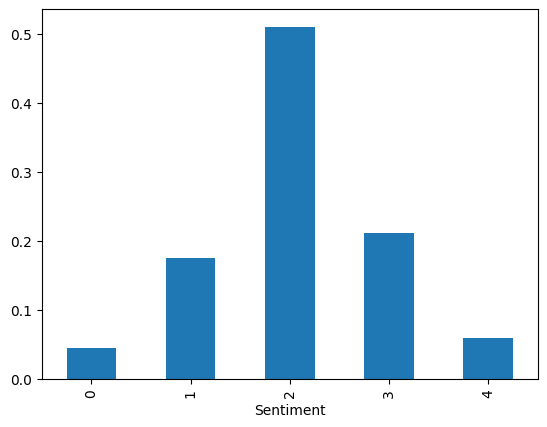

In [13]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
word_tokenize('Hello, world!')

['Hello', ',', 'world', '!']

In [17]:
from nltk.stem.snowball import SnowballStemmer

In [18]:
stemmer = SnowballStemmer('english')

In [19]:
stemmer.stem('running')

'run'

In [20]:
stemmer.stem('loving')

'love'

In [21]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [22]:
tokenize('Hello, world! is the shitiest word ever heard in programming 23')

['hello',
 'world',
 'is',
 'the',
 'shitiest',
 'word',
 'ever',
 'heard',
 'in',
 'program']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

In [26]:
english_stopwords = stopwords.words('english')

In [27]:
', '.join(english_stopwords[:116])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such"

In [28]:
selected_stopwords = english_stopwords[:116]

In [29]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [30]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7b19e02fdd80>)

In [31]:
len(vectorizer.vocabulary_)

2000

In [32]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [33]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [34]:
inputs = vectorizer.transform(raw_df.Phrase)

In [35]:
inputs.shape

(156060, 2000)

In [36]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [38]:
# Handle missing values in 'Phrase' column before vectorization
test_df['Phrase'] = test_df['Phrase'].fillna('')  # Replace NaN with empty string
test_inputs = vectorizer.transform(test_df.Phrase)

In [39]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [40]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [41]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 472376 stored elements in Compressed Sparse Row format>

In [42]:
TRAIN_SIZE = 110_000

In [43]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [44]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [45]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [46]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
train_preds = model.predict(train_inputs)

In [51]:
train_targets

,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
109995,1
109996,0
109997,1
109998,0


In [52]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(train_targets, train_preds)

0.6377363636363637

In [55]:
val_preds = model.predict(val_inputs)

In [56]:
accuracy_score(val_targets , val_preds)

0.5788753799392097

### Study Predictions on Sample Inputs

In [57]:
small_df = raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
29827,29828,1383,the bravery and dedication,3
63119,63120,3192,has a desolate air,2
151336,151337,8250,pitted,2
71348,71349,3639,universal human impulse,3
87271,87272,4525,allows nothing to get in the way,2
127206,127207,6841,to squeeze by on Angelina Jolie 's surprising ...,2
72632,72633,3709,stricken,2
139775,139776,7584,it does a bang-up job of pleasing the crowds,3
123735,123736,6644,a story that puts old-fashioned values under t...,3
140537,140538,7626,"a thriller , and",2


In [58]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [59]:
small_preds = model.predict(small_inputs)

In [60]:
small_preds

array([2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [61]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [62]:
test_preds = model.predict(test_inputs)

In [63]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [64]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [65]:
sub_df.Sentiment = test_preds

In [66]:
sub_df.to_csv('submission.csv', index=False)

In [67]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 - Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
model1 = MultinomialNB(class_prior=(0.05, 0.2 ,0.5, 0.2, 0.05))

In [70]:
model1.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [71]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5882454545454545

In [72]:
accuracy_score(val_targets, model1.predict(val_inputs))

0.5452670429874077

### Model 2 - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model2 = RandomForestClassifier(n_estimators=150, max_depth=5, n_jobs=-1, random_state=42)

In [75]:
model2.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [76]:
accuracy_score(train_targets, model2.predict(train_inputs))

0.5167454545454545

In [77]:
accuracy_score(val_targets, model2.predict(val_inputs))

0.49370386452453324

### Model 3 - Decision Trees

In [78]:
# In cell ipython-input-29-eeeb94a4c9b7
from sklearn.tree import DecisionTreeClassifier

# In cell ipython-input-88-eeeb94a4c9b7
model3 = DecisionTreeClassifier(max_depth=5)

In [79]:
model3.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=5)

In [80]:
accuracy_score(train_targets, model3.predict(train_inputs))

0.5267818181818181

In [81]:
accuracy_score(val_targets, model3.predict(val_inputs))

0.5038428137212332

### Model 4 - SVM

In [82]:
from sklearn.svm import SVC

In [83]:
model4 = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
model4.fit(train_inputs, train_targets)

In [ ]:
accuracy_score(train_targets, model4.predict(train_inputs))

In [ ]:
accuracy_score(val_targets, model4.predict(val_inputs))